Problem #1

1.1 Please plot the efficient frontier of the portfolio, and calculate variance when miu manually

In [456]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from cvxopt import matrix, solvers
from numpy import c_
import matplotlib.pyplot as plt

In [457]:
cov = np.matrix([[0.01,-0.01],[-0.01,0.04]])
cov_matrix = inv(cov)
print(cov,"\n", cov_matrix)

[ 1.00e-02 -1.00e-02]
[-1.00e-02  4.00e-02]
 
 [[133.33333333  33.33333333]
 [ 33.33333333  33.33333333]]


In [458]:
I = np.array([1,1])
u = np.array([0.05, 0.1])

In [459]:
A = np.dot(np.matmul(I,cov_matrix), I)

In [460]:
A

233.33333333333337

In [461]:
B = np.dot(np.matmul(I,cov_matrix), u)

In [462]:
B

15.000000000000002

In [463]:
C = np.dot(np.matmul(u,cov_matrix), u)

In [464]:
C

1.0000000000000002

In [465]:
delta = A*C - B*B

In [466]:
delta

8.333333333333371

In [467]:
mean_0 = matrix([0.1, 0.2])


In [468]:
delta = A * C-(B**2)
lamba = (C - mean_0 * B) / delta
gamma = (mean_0 * A - B) / delta
sigma0 = (A * mean_0**2 - 2 * B * mean_0 + C) / delta


w1=np.dot(np.dot(lamb.T,cov_matrix),I)+np.dot(np.dot(gamma.T,cov_matrix),u)


print(w1)
print(lamba)

[3.]
[[-0.06]
 [-0.24]]


In [469]:
#answer for sigma0
sigma0

array([[0.04],
       [0.52]])

#Question 1.2 If we introduce a risk free rate of 0.02, please find the market portfolio of these two stock portfolio, and plot the Capital Market Line (CML) along with the portfolio frontier.


In [470]:
mu = np.array( [0.05, 0.1]).T 
sigma = np.matrix(np.array( [[0.01, -0.01], 
                   [-0.01, 0.04]]))  
sigma_inv = inv(sigma) 
 
# Efficient frontier 
returns = [] 
risks = [] 
portReturn = [] 
 
steps = 200 
w0 = np.linspace(-1, 1, steps , endpoint = False) 
 
for i in range(steps): 
    w = np.array( [ w0[i], (1 - w0[i]) ] ).T 
    cur_re = (w.T.dot(mu)).sum() 
    cur_risk = w.T.dot( (sigma.dot(w)).reshape(2, 1) ) 
    cur_risk = cur_risk.sum() 
     
    returns.append(cur_re) 
    risks.append(cur_risk) 

Text(0.5, 0, 'SD(r)')

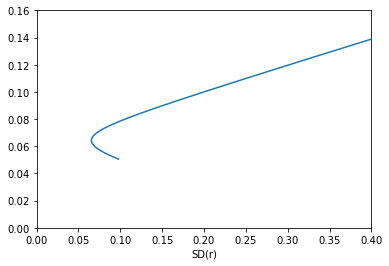

In [471]:
# plt.plot(np.sqrt(risks), rp, label = 'Efficient Frontier')  
plt.plot(np.sqrt(risks), returns, label = 'Efficient Frontier') 
plt.xlim(0, .4) 
plt.ylim(0, 0.16) 
plt.xlabel('SD(r)') 

In [472]:
#returns
#np.sqrt(risks)

In [473]:
l=[]
for i in returns:
    m=i-0.02
    l.append(m)

In [474]:
k=max(l/np.sqrt(risks))
k

0.7022602074068443

In [475]:
#prepare for CML line
x=np.arange(0,0.3,0.01) 
b=0.02
y=k*x+b

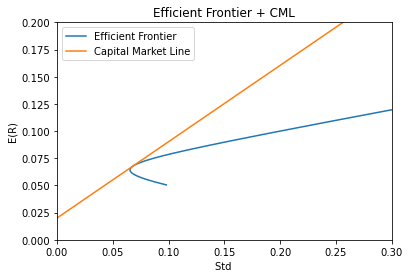

In [476]:
#plot EF  
figsize=(20, 10)
plt.plot(np.sqrt(risks), returns, label = 'Efficient Frontier') 

#plot CML line
plt.plot(x,y,label = 'Capital Market Line') 

plt.xlim(0,0.3) 
plt.ylim(0, 0.2) 
plt.xlabel('Std ') 
plt.ylabel('E(R)') 
plt.title('Efficient Frontier + CML') 
plt.legend() 
plt.show() 

#Problem 2 
#Part 1: Use data from 2013 to 2016 data to build the global minimum variance port- folio (allowing for short sales). And compare the portfolio daily return for the period from 2017 to 2018 with the S&P 500 index daily return using Sharpe ratio.

Question 2

Data Cleaning + Portfolio Construction, answers are in the end


2.1 Use data from 2013 to 2016 data to build the global minimum variance port- folio (allowing for short sales). And compare the portfolio daily return for the period from 2017 to 2018 with the S&P 500 index daily return using Sharpe ratio.

In [477]:
import pandas as pd 
from scipy.optimize import minimize 

In [478]:
df_sp500 = pd.read_csv('all_stocks_5yr.csv')

In [479]:
## convert 'date' and 'name' from string type to datetime
for dtype in df_sp500.dtypes.iteritems():
    print(dtype)
df_sp500['date'] = pd.to_datetime(df_sp500['date'])
df_sp500.set_index('date')

('date', dtype('O'))
('open', dtype('float64'))
('high', dtype('float64'))
('low', dtype('float64'))
('close', dtype('float64'))
('volume', dtype('int64'))
('Name', dtype('O'))


,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...
2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS


In [480]:
## select 20 stocks from the S&P 500: 10 with the highest volatility and 10 with
## using data from 2013-2016
## reframe dataset using closing price, by date and ETFs (stock name)
ETFs = set(df_sp500['Name'])
df = pd.DataFrame(df_sp500[df_sp500['Name'] == 'AAL'][[ 'date','close' ]])

size = df.size
cols = ['date','AAL']
for i in ETFs:
    df_stock = df_sp500[df_sp500['Name'] == i][[ 'date','close' ]]
    df_stock.name = i
    if df_stock.size == size:
        df = df.merge(df_stock, on = 'date')
        cols.append(i)
df.columns = cols
df=df.set_index('date')
df

/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is

/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is

/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is

/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is

/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is

/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is

/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is

/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(df_stock, on = 'date')
/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_22653/3753756252.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is

,AAL,PPL,DG,HAS,LEN,TXT,MCHP,XEC,BBT,MET,...,WMB,EXR,BK,RTN,AIG,ALL,ABT,AET,FITB,F
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,14.75,30.31,46.00,39.84,39.1765,29.31,36.39,66.60,30.65,36.90,...,36.00,40.28,27.90,54.16,38.79,45.14,34.41,50.60,16.61,13.10
2013-02-11,14.46,30.39,45.75,39.69,38.5000,29.56,36.44,66.75,30.63,36.90,...,35.74,40.41,27.93,54.55,39.45,45.25,34.26,50.38,16.50,13.11
2013-02-12,14.27,30.52,45.04,39.89,40.0686,29.14,36.62,67.00,30.60,37.13,...,35.84,40.35,27.90,54.36,38.63,45.61,34.30,50.15,16.56,13.08
2013-02-13,14.66,30.47,44.39,40.42,40.0294,29.40,36.77,67.75,30.52,37.50,...,35.64,40.06,28.17,53.97,38.87,45.88,34.46,49.51,16.11,13.04
2013-02-14,13.99,30.53,45.03,40.88,39.8431,29.48,37.32,67.25,30.36,36.69,...,35.46,39.54,28.10,53.76,39.21,45.88,34.70,49.56,16.13,13.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,53.88,31.23,102.28,95.74,62.8400,59.84,94.54,113.41,55.70,48.39,...,31.68,82.06,57.50,210.85,64.17,98.72,62.18,187.39,33.66,10.92
2018-02-02,52.10,31.19,99.44,94.12,60.0200,59.06,93.31,110.95,55.11,47.56,...,30.70,81.84,56.33,206.80,63.04,97.94,61.69,185.00,33.13,10.71
2018-02-05,49.76,30.30,95.80,91.33,57.7000,56.66,89.50,107.91,52.89,45.89,...,29.48,79.87,54.38,198.36,60.63,95.02,58.73,180.95,31.70,10.24


In [487]:
 ## dataset from 2017-2018

df_all=df['2013-01-01':'2018-2-07']
#df_portfolio=df_all.pct_change().dropna()

## highest and lowest 10 variation among ETFs in df1
highest10 = np.var(df_all).nlargest(10).index
lowest10 = np.var(df_all).nsmallest(10).index


In [492]:
portfolio =list(highest10)+list(lowest10)
portfolio

['PCLN',
 'AMZN',
 'GOOGL',
 'MTD',
 'AZO',
 'CMG',
 'EQIX',
 'REGN',
 'CHTR',
 'ISRG',
 'AES',
 'PBCT',
 'WU',
 'F',
 'HBAN',
 'HST',
 'KO',
 'CA',
 'PFE',
 'WY']

In [486]:
df1

,CHK,AMD,FCX,LNT,VRTX,INCY,MRO,WMB,RRC,MU,PEP,WM,RSG,KO,PG,JNJ,SO,BRK.B,MCD,CB
date,,,,,,,,,,,,,,,,,,,,
2013-02-11,-0.008898,0.030888,-0.008698,0.002803,-0.006522,0.002183,-0.006371,-0.007222,-0.020374,0.020645,-0.003306,0.000275,0.004820,-0.004127,0.000792,-0.000927,0.004789,-0.001234,0.003162,0.002436
2013-02-12,-0.001995,0.037453,0.009624,0.002795,0.004158,0.003268,0.008744,0.002798,0.004952,0.001264,-0.002626,0.004131,-0.002558,-0.027195,0.002242,0.005172,0.002270,0.005868,-0.000736,0.004745
2013-02-13,0.027986,-0.007220,-0.000841,-0.000643,0.012857,0.012486,0.010113,-0.005580,0.003942,0.003788,-0.009284,0.004937,0.000962,-0.009318,0.007634,-0.001847,0.000226,0.002764,-0.011567,-0.001843
2013-02-14,-0.008264,0.000000,-0.003086,0.008367,-0.017642,0.102413,0.010870,-0.005051,0.005890,0.016352,0.010909,0.013646,0.002562,-0.009944,0.002874,0.001983,-0.005886,0.012657,-0.004681,-0.002539
2013-02-15,-0.019118,-0.014545,-0.013791,-0.001277,-0.001095,0.070039,-0.019242,-0.009870,-0.019099,-0.021040,0.019369,-0.012116,0.000319,0.015744,-0.003126,0.004617,0.004555,0.005645,0.003634,0.000694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,0.013624,-0.001724,0.000725,0.001322,0.031797,0.014487,0.001109,0.041584,0.014027,0.003019,-0.002468,0.001836,0.000698,0.001203,0.005801,0.004505,-0.000608,-0.004276,-0.004688,-0.001500
2016-12-27,0.020161,0.042314,-0.003621,0.003698,0.011842,-0.003983,0.004430,0.006971,0.002017,0.001720,0.000381,0.000564,0.000872,0.000240,-0.004237,-0.000431,-0.000608,-0.002238,-0.000568,-0.003230
2016-12-28,-0.047431,-0.043082,-0.013808,-0.012105,-0.007980,-0.013947,-0.015987,-0.023285,-0.012942,-0.022318,-0.004851,0.000000,-0.001568,-0.005287,-0.006265,-0.006988,-0.008114,-0.007275,-0.003169,-0.003919


In [ ]:
portfolio = df1[list(highest10) + list(lowest10)] ## 20 ETFs in the porfolio
print(portfolio.columns)

In [493]:
df_portfolio=df_all.pct_change().dropna()

In [494]:
df_portfolio

,AAL,PPL,DG,HAS,LEN,TXT,MCHP,XEC,BBT,MET,...,WMB,EXR,BK,RTN,AIG,ALL,ABT,AET,FITB,F
date,,,,,,,,,,,,,,,,,,,,,
2013-02-11,-0.019661,0.002639,-0.005435,-0.003765,-0.017268,0.008530,0.001374,0.002252,-0.000653,0.000000,...,-0.007222,0.003227,0.001075,0.007201,0.017015,0.002437,-0.004359,-0.004348,-0.006623,0.000763
2013-02-12,-0.013140,0.004278,-0.015519,0.005039,0.040743,-0.014208,0.004940,0.003745,-0.000979,0.006233,...,0.002798,-0.001485,-0.001074,-0.003483,-0.020786,0.007956,0.001168,-0.004565,0.003636,-0.002288
2013-02-13,0.027330,-0.001638,-0.014432,0.013287,-0.000978,0.008922,0.004096,0.011194,-0.002614,0.009965,...,-0.005580,-0.007187,0.009677,-0.007174,0.006213,0.005920,0.004665,-0.012762,-0.027174,-0.003058
2013-02-14,-0.045703,0.001969,0.014418,0.011381,-0.004654,0.002721,0.014958,-0.007380,-0.005242,-0.021600,...,-0.005051,-0.012981,-0.002485,-0.003891,0.008747,0.000000,0.006965,0.001010,0.001241,0.005368
2013-02-15,0.036455,-0.003931,-0.014657,-0.008562,-0.010825,-0.003053,-0.006565,-0.034201,-0.002964,-0.006814,...,-0.009870,-0.021244,-0.003915,0.004092,-0.021933,-0.000654,0.010951,-0.007264,-0.005270,-0.006865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,-0.008100,-0.020082,-0.008146,0.012372,0.002873,0.019942,-0.007141,0.010784,0.009241,0.006657,...,0.009239,-0.017010,0.014109,0.009141,0.003911,-0.000506,0.000322,0.003051,0.016918,-0.004558
2018-02-02,-0.033036,-0.001281,-0.027767,-0.016921,-0.044876,-0.013035,-0.013010,-0.021691,-0.010592,-0.017152,...,-0.030934,-0.002681,-0.020348,-0.019208,-0.017609,-0.007901,-0.007880,-0.012754,-0.015746,-0.019231
2018-02-05,-0.044914,-0.028535,-0.036605,-0.029643,-0.038654,-0.040637,-0.040832,-0.027400,-0.040283,-0.035114,...,-0.039739,-0.024071,-0.034617,-0.040812,-0.038230,-0.029814,-0.047982,-0.021892,-0.043163,-0.043884


In [495]:
highest10 = np.var(df_portfolio).nlargest(10)
lowest10 = np.var(df_portfolio).nsmallest(10)

In [496]:
highest10

CHK     0.001734
AMD     0.001427
FCX     0.001163
LNT     0.001113
VRTX    0.001030
INCY    0.000886
MRO     0.000884
WMB     0.000873
RRC     0.000754
MU      0.000750
dtype: float64

In [497]:
lowest10

PEP      0.000071
WM       0.000077
RSG      0.000077
KO       0.000079
PG       0.000080
JNJ      0.000081
SO       0.000085
BRK.B    0.000086
MCD      0.000087
CB       0.000090
dtype: float64

In [498]:
col_names=list(highest10.index)+list(lowest10.index)
col_names

['CHK',
 'AMD',
 'FCX',
 'LNT',
 'VRTX',
 'INCY',
 'MRO',
 'WMB',
 'RRC',
 'MU',
 'PEP',
 'WM',
 'RSG',
 'KO',
 'PG',
 'JNJ',
 'SO',
 'BRK.B',
 'MCD',
 'CB']

In [499]:
portfolio=df_portfolio[col_names]
portfolio

,CHK,AMD,FCX,LNT,VRTX,INCY,MRO,WMB,RRC,MU,PEP,WM,RSG,KO,PG,JNJ,SO,BRK.B,MCD,CB
date,,,,,,,,,,,,,,,,,,,,
2013-02-11,-0.008898,0.030888,-0.008698,0.002803,-0.006522,0.002183,-0.006371,-0.007222,-0.020374,0.020645,-0.003306,0.000275,0.004820,-0.004127,0.000792,-0.000927,0.004789,-0.001234,0.003162,0.002436
2013-02-12,-0.001995,0.037453,0.009624,0.002795,0.004158,0.003268,0.008744,0.002798,0.004952,0.001264,-0.002626,0.004131,-0.002558,-0.027195,0.002242,0.005172,0.002270,0.005868,-0.000736,0.004745
2013-02-13,0.027986,-0.007220,-0.000841,-0.000643,0.012857,0.012486,0.010113,-0.005580,0.003942,0.003788,-0.009284,0.004937,0.000962,-0.009318,0.007634,-0.001847,0.000226,0.002764,-0.011567,-0.001843
2013-02-14,-0.008264,0.000000,-0.003086,0.008367,-0.017642,0.102413,0.010870,-0.005051,0.005890,0.016352,0.010909,0.013646,0.002562,-0.009944,0.002874,0.001983,-0.005886,0.012657,-0.004681,-0.002539
2013-02-15,-0.019118,-0.014545,-0.013791,-0.001277,-0.001095,0.070039,-0.019242,-0.009870,-0.019099,-0.021040,0.019369,-0.012116,0.000319,0.015744,-0.003126,0.004617,0.004555,0.005645,0.003634,0.000694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,-0.011429,-0.035662,-0.002564,-0.016855,0.036675,-0.006867,0.013194,0.009239,-0.022456,-0.028134,0.000000,-0.006559,-0.000145,-0.002942,-0.005675,0.013243,-0.016183,0.013387,0.004441,-0.004291
2018-02-02,-0.037572,-0.060377,-0.076093,-0.004350,-0.039020,-0.041820,-0.049376,-0.030934,-0.027279,-0.039303,-0.013549,-0.015026,-0.007995,-0.015174,-0.018637,-0.016712,-0.004732,-0.037422,-0.014660,-0.014343
2018-02-05,-0.072072,-0.070683,-0.017807,-0.017733,-0.066771,-0.006750,-0.042237,-0.039739,-0.033210,-0.034787,-0.035477,-0.055241,-0.048359,-0.039375,-0.037864,-0.052949,-0.010188,-0.058914,-0.032648,-0.038499


In [500]:
df1 = portfolio['2013-01-01':'2016-12-31'] ## dataset from 2013-2016
df2 = portfolio['2017-01-03':'2018-2-07']

In [501]:
#df1 2013-2016

In [502]:
# 2017-2018 spy500 index daily return
import yfinance as yf
spy = yf.download('SPY',start='2017-01-01', end = '2018-02-17')['Adj Close']
spy = spy.pct_change().dropna()

print('S&P500 daily std return for 2017-2018:', spy.std())
spy_sharpe = spy.mean()/spy.std()


[*********************100%***********************]  1 of 1 completed
S&P500 daily std return for 2017-2018: 0.0059626236129731785


In [503]:
import numpy as np
from scipy.optimize import minimize

In [504]:
df2.shape[1]

20

In [505]:
#df2.cov()

In [506]:
#the bojective is to minimize portfolio risk
def objective(weights):
    weights = np.array(weights)
    return weights.dot(df1.cov()).dot(weights.T)

In [507]:
#The constraints
cons = (#The weights must sum up to one.
        {"type":"eq", "fun": lambda x: np.sum(x) - 1})

In [508]:
#Every stock can get any weight from 0 to 1
bounds = tuple((-1, 1) for x in range(df2.shape[1]))
#bounds

In [509]:
guess = [1/df2.shape[1] for x in range(df2.shape[1])]
#guess

In [510]:
optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
optimized_results

     fun: 0.00012727602423395762
     jac: array([6.26869652e-04, 4.05426559e-04, 5.27313259e-04, 2.39953239e-04,
       3.49011800e-04, 3.28848893e-04, 4.50118976e-04, 4.41023260e-04,
       3.60315416e-04, 3.73798013e-04, 9.09710088e-05, 9.45455668e-05,
       9.88528191e-05, 9.16881145e-05, 9.31723225e-05, 1.03327331e-04,
       6.38747333e-05, 1.37808020e-04, 8.59868687e-05, 1.28135311e-04])
 message: 'Optimization terminated successfully'
    nfev: 21
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [511]:
print(optimized_results.x)
print('we should get 1') 
print(np.sum(optimized_results.x))

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
we should get 1
1.0000000000000002


In [512]:
#np.sum(df2.mean()*optimized_results.x)

In [513]:
pd.DataFrame(list(zip(col_names, optimized_results.x)), columns=['col_names', 'Weight'])

,col_names,Weight
0,CHK,0.05
1,AMD,0.05
2,FCX,0.05
3,LNT,0.05
4,VRTX,0.05
5,INCY,0.05
6,MRO,0.05
7,WMB,0.05
8,RRC,0.05
9,MU,0.05


In [514]:
opt_result2 = np.matmul(np.matrix(df1), np.array(optimized_results.x))
print('global minimum variance daily return for 2016-2017:', opt_result2.mean())
opt_result = np.matmul(np.matrix(df2), np.array(optimized_results.x))
print('global minimum variance daily return for 2017-2018:', opt_result.mean())
print('S&P500 daily mean return for 2017-2018:', spy.mean())

global minimum variance daily return for 2016-2017: 0.0005606800955022339
global minimum variance daily return for 2017-2018: 0.0003000021880309013
S&P500 daily mean return for 2017-2018: 0.0007671298957971357


In [515]:
opt_result_sharpe=opt_result.mean()/opt_result.std()
opt_result_sharpe

0.04299736293337377

2.2 Now let’s put constraints on the weight of all 20 stocks. Assume that the portfolio weights add up to 1, and we want to make sure each stock has minimum weight of 0.0001. Compare this new portfolio daily return with the unconstrained portfolio in the last question for the period from 2017 and 2018.

In [516]:
#optimizing with bounds on new weights
bound2 = tuple((0.0001,1) for x in range(df2.shape[1]))
cons = ({"type":"eq","fun": lambda x: np.sum(x) - 1})
new_optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bound2,constraints = cons)

In [517]:
new_optimized_results

     fun: 0.00012727602423395762
     jac: array([6.26869652e-04, 4.05426559e-04, 5.27313259e-04, 2.39953239e-04,
       3.49011800e-04, 3.28848893e-04, 4.50118976e-04, 4.41023260e-04,
       3.60315416e-04, 3.73798013e-04, 9.09710088e-05, 9.45455668e-05,
       9.88528191e-05, 9.16881145e-05, 9.31723225e-05, 1.03327331e-04,
       6.38747333e-05, 1.37808020e-04, 8.59868687e-05, 1.28135311e-04])
 message: 'Optimization terminated successfully'
    nfev: 21
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [518]:
new_weight = pd.DataFrame(list(zip(col_names, new_optimized_results.x)), columns=['Name', 'Weight'])
new_weight

,Name,Weight
0,CHK,0.05
1,AMD,0.05
2,FCX,0.05
3,LNT,0.05
4,VRTX,0.05
5,INCY,0.05
6,MRO,0.05
7,WMB,0.05
8,RRC,0.05
9,MU,0.05


In [519]:
opt_result_newret = np.matmul(np.matrix(df2),np.array(new_optimized_results.x))
unstrained_sharpe=opt_result_newret.mean()/opt_result_newret.std()
unstrained_sharpe

0.04299736293337377

Question 2.1 Answer

In [520]:
print('global minimum variance daily return for 2016-2017:', opt_result2.mean())

global minimum variance daily return for 2016-2017: 0.0005606800955022339


In [521]:
print('Constrained global minimium portfolio daily return 2017-2018: ', opt_result.mean()) 
print('S&P500 daily mean return for 2017-2018:', spy.mean())

Constrained global minimium portfolio daily return 2017-2018:  0.0003000021880309013
S&P500 daily mean return for 2017-2018: 0.0007671298957971357


Question 2.2 Answer

In [522]:
print('Constrained global minimium portfolio sharpe ratio:',opt_result_sharpe)
print('Unconstrained global minimium portfolio sharpe ratio:',unstrained_sharpe)
print('S&P500 index daily sharpe ratio for 2017-2018:', spy_sharpe)

Constrained global minimium portfolio sharpe ratio: 0.04299736293337377
Unconstrained global minimium portfolio sharpe ratio: 0.04299736293337377
S&P500 index daily sharpe ratio for 2017-2018: 0.12865643474930277
